In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import mpl_toolkits
from IPython.display import HTML
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

SalePrice = pd.read_csv('sample_submission.csv', encoding='latin-1')
SalePrices = pd.DataFrame(SalePrice)
SalePrice.sort_values(by='Id', ascending=True, na_position='first')
SalePrice['SalePrice'].dtype


dtype('float64')

In [5]:
train = pd.read_csv('train.csv', encoding = 'latin-1')
#train = pd.DataFrame(train)
train.fillna('NA', inplace =True)


In [20]:



#train['GarageCond'].replace(np.nan, 'NA', regex = True)


#yy = LabelEncoder()
#yy.fit_transform(train['GarageCond'])#.values.astype(float)


#train[['SaleCondition', 'Fence','PoolQC']] = train.fit_transform(train[['SaleCondition', 'Fence','PoolQC']])

#MultiColumnLabelEncoder = yy.fit_transform(train['GarageCond','GarageCond'])

# double check 'Functional','Electrical','Heating','Foundation','MasVnrType',
# 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle','HouseStyle'
# 'BldgType','Condition2', 'Condition1','Neighborhood', 'LotConfig'
# 'Utilities','LandContour', 'Alley','MSZoning' ,MSSubClass','MiscFeature'
#

In [6]:
from sklearn.preprocessing import LabelEncoder

def scaleColumns(df, cols_to_scale):
    yy=LabelEncoder()
    for col in cols_to_scale:
        df[col] = pd.DataFrame(yy.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [9]:
scaleColumns(train,['SaleCondition', 'SaleType','Fence','PoolQC','GarageCond','GarageQual','GarageFinish','' 'KitchenQual','GarageType','FireplaceQu','CentralAir','HeatingQC','BsmtFinType2', 'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','ExterCond','ExterQual','OverallCond', 'OverallQual','LandSlope','LotShape'])

#scaleColumns(train,['SaleCondition', 'SaleType','Fence','PoolQC','GarageCond','GarageQual','GarageFinish','' 'KitchenQual','GarageType','FireplaceQu','CentralAir','HeatingQC','BsmtFinType2', 'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','ExterCond','ExterQual','OverallCond', 'OverallQual','LandSlope','LotShape'])
#train[['SaleCondition','SaleType']]


/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley  LotShape  \
0        1          60       RL          65     8450   Pave    NA         3   
1        2          20       RL          80     9600   Pave    NA         3   
2        3          60       RL          68    11250   Pave    NA         0   
3        4          70       RL          60     9550   Pave    NA         0   
4        5          60       RL          84    14260   Pave    NA         0   
5        6          50       RL          85    14115   Pave    NA         0   
6        7          20       RL          75    10084   Pave    NA         3   
7        8          60       RL          NA    10382   Pave    NA         0   
8        9          50       RM          51     6120   Pave    NA         3   
9       10         190       RL          50     7420   Pave    NA         3   
10      11          20       RL          70    11200   Pave    NA         3   
11      12          60       RL          85    11924   Pave    NA         0   
12      13          20       RL          NA    12968   Pave    NA         1   
13      14          20       RL          91    10652   Pave    NA         0   
14      15          20       RL          NA    10920   Pave    NA         0   
15      16          45       RM          51     6120   Pave    NA         3   
16      17          20       RL          NA    11241   Pave    NA         0   
17      18          90       RL          72    10791   Pave    NA         3   
18      19          20       RL          66    13695   Pave    NA         3   
19      20          20       RL          70     7560   Pave    NA         3   
20      21          60       RL         101    14215   Pave    NA         0   
21      22          45       RM          57     7449   Pave  Grvl         3   
22      23          20       RL          75     9742   Pave    NA         3   
23      24         120       RM          44     4224   Pave    NA         3   
24      25          20       RL          NA     8246   Pave    NA         0   
25      26          20       RL         110    14230   Pave    NA         3   
26      27          20       RL          60     7200   Pave    NA         3   
27      28          20       RL          98    11478   Pave    NA         3   
28      29          20       RL          47    16321   Pave    NA         0   
29      30          30       RM          60     6324   Pave    NA         0   
...    ...         ...      ...         ...      ...    ...   ...       ...   
1430  1431          60       RL          60    21930   Pave    NA         2   
1431  1432         120       RL          NA     4928   Pave    NA         0   
1432  1433          30       RL          60    10800   Pave  Grvl         3   
1433  1434          60       RL          93    10261   Pave    NA         0   
1434  1435          20       RL          80    17400   Pave    NA         3   
1435  1436          20       RL          80     8400   Pave    NA         3   
1436  1437          20       RL          60     9000   Pave    NA         3   
1437  1438          20       RL          96    12444   Pave    NA         3   
1438  1439          20       RM          90     7407   Pave    NA         3   
1439  1440          60       RL          80    11584   Pave    NA         3   
1440  1441          70       RL          79    11526   Pave    NA         0   
1441  1442         120       RM          NA     4426   Pave    NA         3   
1442  1443          60       FV          85    11003   Pave    NA         3   
1443  1444          30       RL          NA     8854   Pave    NA         3   
1444  1445          20       RL          63     8500   Pave    NA         3   
1445  1446          85       RL          70     8400   Pave    NA         3   
1446  1447          20       RL          NA    26142   Pave    NA         0   
1447  1448          60       RL          80    10000   Pave    NA         3   
1448  1449          50       RL          70    11767   Pav

In [8]:
#train['GarageQual']
#train.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,})



In [10]:
test = pd.read_csv('test.csv', encoding = 'latin-1')
test = pd.DataFrame(test)
test.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(SalePrice, SalePrices, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1167, 2) (1167, 2)
(292, 2) (292, 2)


In [13]:
#train['SalePrice'].corr(train['LotArea'])
x = train.drop(['Id', 'YrSold'], axis=1).corr(method='spearman').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)

#x.style.format(abs(x))
x

In [14]:
#train['SalePrice'].corr(train['LotArea'])
train.drop(['Id', 'YrSold'], axis=1).corr(method='pearson').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)


In [15]:
#train['SalePrice'].corr(train['LotArea'])
train.drop(['Id', 'YrSold'], axis=1).corr(method='kendall').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)



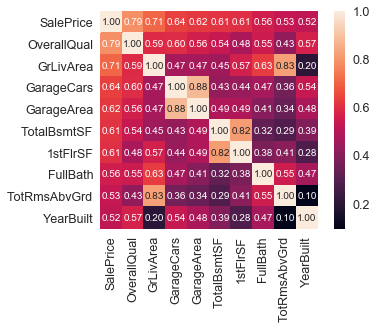

In [9]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:

new_train = train.filter(['SalePrice','OverallQual', 'YearBuilt', 'YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageType','GarageCars','GarageArea'])
new_train


SalePrice  OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  \
0        208500            6       2003          2003          2         2   
1        181500            5       1976          1976          3         2   
2        223500            6       2001          2002          2         2   
3        140000            6       1915          1970          3         4   
4        250000            7       2000          2000          2         2   
5        143000            4       1993          1995          3         2   
6        307000            7       2004          2005          2         0   
7        200000            6       1973          1973          3         2   
8        129900            6       1931          1950          3         4   
9        118000            4       1939          1950          3         4   
10       129500            4       1965          1965          3         4   
11       345000            8       2005          2006          0         0   
12       144000            4       1962          1962          3         4   
13       279500            6       2006          2007          2         2   
14       157000            5       1960          1960          3         4   
15       132000            6       1929          2001          3         4   
16       149000            5       1970          1970          3         4   
17        90000            3       1967          1967          3         3   
18       159000            4       2004          2004          3         4   
19       139000            4       1958          1965          3         4   
20       325300            7       2005          2006          2         0   
21       139400            6       1930          1950          3         4   
22       230000            7       2002          2002          2         2   
23       129900            4       1976          1976          3         2   
24       154000            4       1968          2001          3         4   
25       256300            7       2007          2007          2         2   
26       134800            4       1951          2000          3         4   
27       306000            7       2007          2008          2         0   
28       207500            4       1957          1997          3         4   
29        68500            3       1927          1950          3         4   
...         ...          ...        ...           ...        ...       ...   
1430     192140            4       2005          2005          2         2   
1431     143750            5       1976          1976          3         2   
1432      64500            3       1927          2007          3         4   
1433     186500            5       2000          2000          3         2   
1434     160000            4       1977          1977          3         4   
1435     174000            5       1962          2005          2         4   
1436     120500            3       1971          1971          3         4   
1437     394617            7       2008          2008          0         0   
1438     149700            5       1957          1996          3         4   
1439     197000            6       1979          1979          3         4   
1440     191000            5       1922          1994          3         0   
1441     149300            5       2004          2004          2         2   
1442     310000            9       2008          2008          0         0   
1443     121000            5       1916          1950          3         4   
1444     179600            6       2004          2004          2         2   
1445     129000            5       1966          1966          3         4   
1446     157900            4       1962          1962          3         4   
1447     240000            7       1995          1996          2         2   
1448     112000            3       1910          2000          3         1   
1449      92000            4

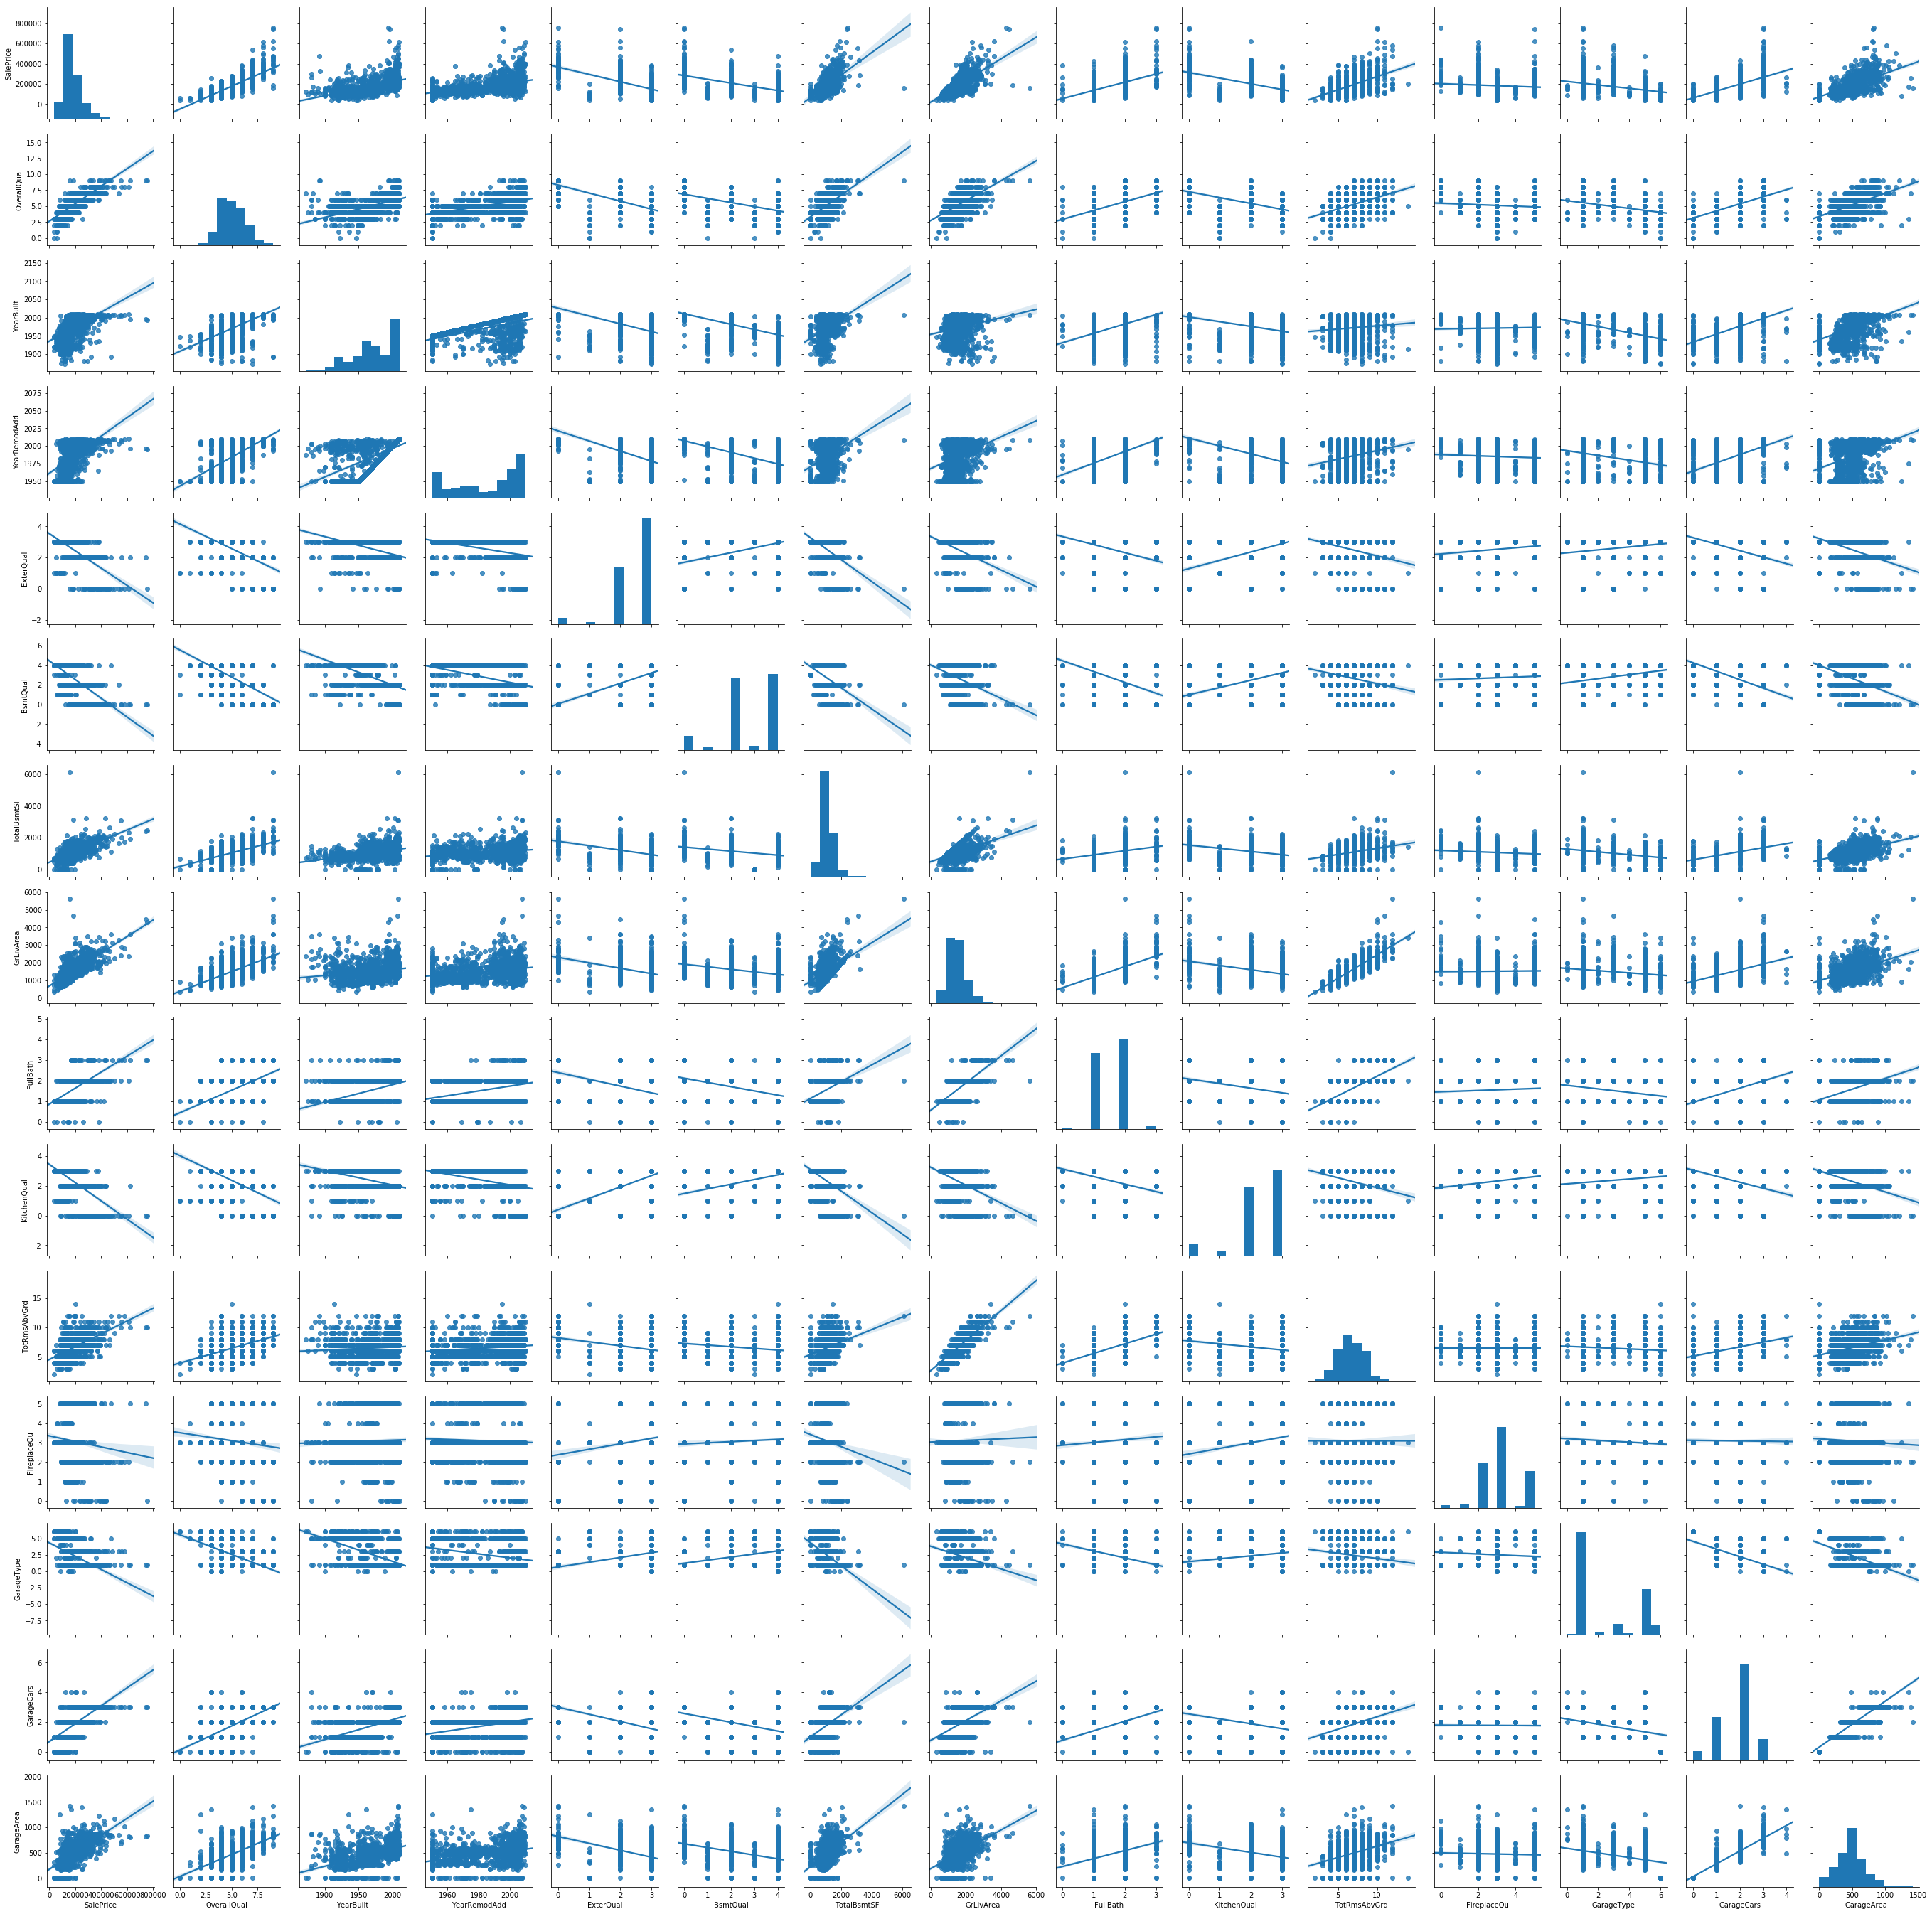

In [17]:

##train.plot(x="GarageCars",y="SalePrice", color="r", label="SalePrice vs. GarageCars", ax=ax)
#train.plot( x="SalePrice",y="FullBath", color="g", label="FullBath vs. SalePrice", ax=ax)
##train.plot( x="GarageCars",y="SalePrice", color="purple", label="SalePrice vs. GarageCars", ax=ax)

#ax.set_xlabel("horizontal label")
#ax.set_ylabel("vertical label")
#plt.show()

#df = sns.load_dataset('train.csv')
sns.pairplot(new_train, kind='reg')
plt.show()

In [19]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
SalePrice         0      0.0
Heating           0      0.0
RoofStyle         0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrType        0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
ExterCond         0      0.0
Foundation        0      0.0
BsmtQual          0      0.0
BsmtCond          0      0.0
BsmtExposure      0      0.0
BsmtFinType1      0      0.0
BsmtFinSF1        0      0.0
BsmtFinType2      0      0.0
BsmtFinSF2        0      0.0
BsmtUnfSF         0      0.0
YearRemodAdd      0      0.0

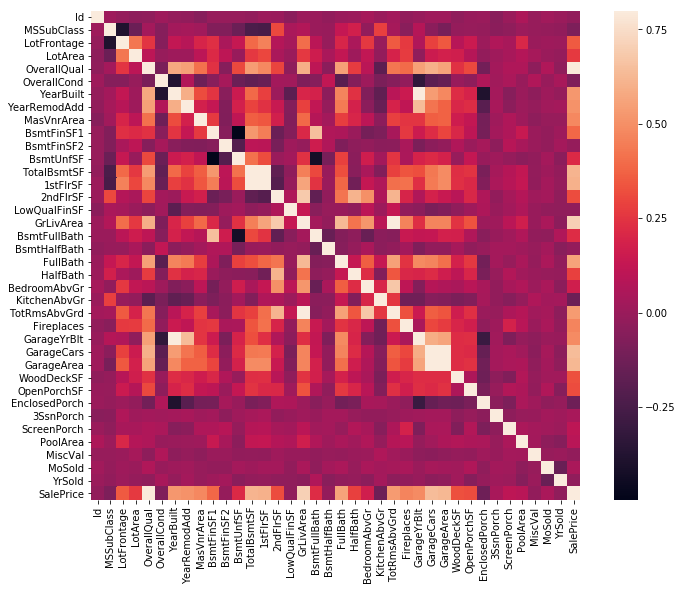

In [8]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
train.fillna(0)
test.fillna(0)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave     0      Reg   
1     1462          20       RL         81.0    14267   Pave     0      IR1   
2     1463          60       RL         74.0    13830   Pave     0      IR1   
3     1464          60       RL         78.0     9978   Pave     0      IR1   
4     1465         120       RL         43.0     5005   Pave     0      IR1   
5     1466          60       RL         75.0    10000   Pave     0      IR1   
6     1467          20       RL          0.0     7980   Pave     0      IR1   
7     1468          60       RL         63.0     8402   Pave     0      IR1   
8     1469          20       RL         85.0    10176   Pave     0      Reg   
9     1470          20       RL         70.0     8400   Pave     0      Reg   
10    1471         120       RH         26.0     5858   Pave     0      IR1   
11    1472         160       RM         21.0     1680   Pave     0      Reg   
12    1473         160       RM         21.0     1680   Pave     0      Reg   
13    1474         160       RL         24.0     2280   Pave     0      Reg   
14    1475         120       RL         24.0     2280   Pave     0      Reg   
15    1476          60       RL        102.0    12858   Pave     0      IR1   
16    1477          20       RL         94.0    12883   Pave     0      IR1   
17    1478          20       RL         90.0    11520   Pave     0      Reg   
18    1479          20       RL         79.0    14122   Pave     0      IR1   
19    1480          20       RL        110.0    14300   Pave     0      Reg   
20    1481          60       RL        105.0    13650   Pave     0      Reg   
21    1482         120       RL         41.0     7132   Pave     0      IR1   
22    1483          20       RL        100.0    18494   Pave     0      IR1   
23    1484         120       RL         43.0     3203   Pave     0      Reg   
24    1485          80       RL         67.0    13300   Pave     0      IR1   
25    1486          60       RL         63.0     8577   Pave     0      IR1   
26    1487          60       RL         60.0    17433   Pave     0      IR2   
27    1488          20       RL         73.0     8987   Pave     0      Reg   
28    1489          20       FV         92.0     9215   Pave     0      Reg   
29    1490          20       FV         84.0    10440   Pave     0      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  2890          30       RM         50.0     7030   Pave     0      Reg   
1430  2891          50       RM         75.0     9060   Pave     0      Reg   
1431  2892          30  C (all)         69.0    12366   Pave     0      Reg   
1432  2893         190  C (all)         50.0     9000   Pave     0      Reg   
1433  2894          50  C (all)         60.0     8520   Grvl     0      Reg   
1434  2895         120       RM         41.0     5748   Pave     0      IR1   
1435  2896         120       RM         44.0     3842   Pave     0      IR1   
1436  2897          20       RL         69.0    23580   Pave     0      IR1   
1437  2898          90       RL         65.0     8385   Pave     0      Reg   
1438  2899          20       RL         70.0     9116   Pave     0      Reg   
1439  2900          80       RL        140.0    11080   Pave     0      Reg   
1440  2901          20       RL          0.0    50102   Pave     0      IR1   
1441  2902          20       RL          0.0     8098   Pave     0      IR1   
1442  2903          20       RL         95.0    13618   Pave     0      Reg   
1443  2904          20       RL         88.0    11577   Pave     0      Reg   
1444  2905          20        0        125.0    31250   Pave     0      Reg   
1445  2906          90       RM         78.0     7020   Pave     0      Reg   
1446  2907         160       RM         41.0     2665   Pave     0      Reg   
1447  2908          20       RL         58.0    10172   Pa

In [27]:

#train.drop(['MSSubClass','OverallCond','BsmtFullBath','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Id', 'YrSold','MiscVal','MoSold','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'], axis=1).corr(method='spearman').style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)


In [5]:
train.crosstab([train.MSZoning],[train.Neighborhood],margines=True)

AttributeError: 'DataFrame' object has no attribute 'crosstab'

In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

NameError: name 'X_train' is not defined

In [35]:

#xx = pd.DataFrame(train, columns = ['MSSubClass','OverallCond','BsmtFullBath','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','MiscVal','MoSold','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice'])



MSSubClass  OverallCond  BsmtFullBath  BsmtFinSF2  LowQualFinSF  \
0             60            5             1           0             0   
1             20            8             0           0             0   
2             60            5             1           0             0   
3             70            5             1           0             0   
4             60            5             1           0             0   
5             50            5             1           0             0   
6             20            5             1           0             0   
7             60            6             1          32             0   
8             50            5             0           0             0   
9            190            6             1           0             0   
10            20            5             1           0             0   
11            60            5             1           0             0   
12            20            6             1           0             0   
13            20            5             0           0             0   
14            20            5             1           0             0   
15            45            8             0           0             0   
16            20            7             1           0             0   
17            90            5             0           0             0   
18            20            5             1           0             0   
19            20            6             0           0             0   
20            60            5             0           0             0   
21            45            7             0           0             0   
22            20            5             0           0             0   
23           120            7             1           0             0   
24            20            8             1         668             0   
25            20            5             0           0             0   
26            20            7             0         486             0   
27            20            5             1           0             0   
28            20            6             1           0             0   
29            30            6             0           0             0   
...          ...          ...           ...         ...           ...   
1430          60            5             0           0             0   
1431         120            6             0           0             0   
1432          30            6             0           0             0   
1433          60            5             1           0             0   
1434          20            5             1           0             0   
1435          20            9             1           0             0   
1436          20            6             0           0             0   
1437          20            5             1           0             0   
1438          20            7             1           0             0   
1439          60            6             0         110             0   
1440          70            7             0           0           384   
1441         120            5             1           0             0   
1442          60            5             1           0             0   
1443          30            6             0           0             0   
1444          20            5             0           0             0   
1445          85            5             1         627             0   
1446          20            7             0           0             0   
1447          60            5             1           0             0   
1448          50            7             0           0             0   
1449         180            7             1           0             0   
1450          90            5             0           0             0   
1451          20            5             0           0             0   
1452         180            5             1           0         

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

# Example settings
n_samples = train['SalePrice'].astype(int)

outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

TypeError: cannot convert the series to <class 'int'>

In [7]:
cova_train = train.cov()
xx = cova_train.max()
xx.sort_values()

YrSold           8.697797e+00
KitchenAbvGr     1.158565e+01
OverallCond      3.797067e+01
BsmtHalfBath     1.144952e+02
LowQualFinSF     3.441210e+03
EnclosedPorch    3.735550e+03
MSSubClass       5.685234e+03
BsmtFullBath     9.362786e+03
MoSold           9.972849e+03
BedroomAbvGr     1.090147e+04
HalfBath         1.135024e+04
Fireplaces       2.391325e+04
FullBath         2.453808e+04
GarageCars       3.802018e+04
TotRmsAbvGrd     6.891717e+04
OverallQual      8.690413e+04
3SsnPorch        1.038372e+05
Id               1.777550e+05
BsmtFinSF2       1.790022e+05
MiscVal          2.461381e+05
PoolArea         2.949323e+05
ScreenPorch      4.936535e+05
LotFrontage      7.124262e+05
YearRemodAdd     8.317079e+05
GarageYrBlt      9.489296e+05
YearBuilt        1.254637e+06
OpenPorchSF      1.662523e+06
WoodDeckSF       3.230258e+06
MasVnrArea       6.854858e+06
BsmtUnfSF        7.528864e+06
GarageArea       1.058910e+07
2ndFlrSF         1.107415e+07
BsmtFinSF1       1.400137e+07
1stFlrSF  

In [ ]:
############################################################

In [10]:
predictions[0:5]

array([[  2448.        , 191745.38637707],
       [  1649.        , 178430.96672818],
       [  2008.        , 160750.36723705],
       [  2262.        , 148103.86700658],
       [  1604.        , 152799.81240244]])

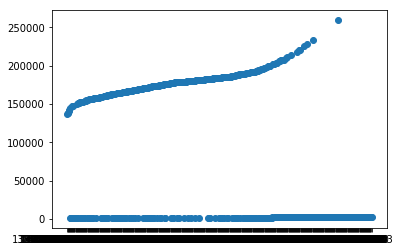

In [13]:
## The line / model
plt.scatter(y_test, predictions)



In [15]:
print(“Score:”, model.score(X_test, y_test))

SyntaxError: invalid character in identifier (<ipython-input-15-4ca8df722632>, line 1)

In [18]:
g=train.groupby('SalePrice')
for SalePrice, SalePrice_train in g:
    print(SalePrice)
    print(SalePrice_train)

34900
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495  496          30  C (all)         60.0     7879   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
495         Lvl    AllPub    ...            0    NaN  GdWo         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
495       0     11   2009        WD        Abnorml      34900  

[1 rows x 81 columns]
35311
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
916  917          20  C (all)         50.0     9000   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
916         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
916       0     10   2006        WD        Abnorml      35311  

[1 rows x 81 columns]
37900
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShap

[1 rows x 81 columns]
68500
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
29  30          30       RM         60.0     6324   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
29         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
29      5   2008        WD         Normal      68500  

[1 rows x 81 columns]
72500
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1321  1322          20       RL          NaN     6627   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1321         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1321       0      7   2008        WD         Normal      72500  

[1 rows x 81 columns]
73000
      Id  MSSubClass MSZoning  LotFrontage  LotAre

[3 rows x 81 columns]
84900
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1049  1050          20       RL         60.0    11100   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1049         Low    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1049       0      4   2010        WD        Abnorml      84900  

[1 rows x 81 columns]
85000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
344    345         160       RM         36.0     2592   Pave   NaN      Reg   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
1013  1014          30       RM         60.0     7200   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
88           Lvl    AllPub    .

[1 rows x 81 columns]
94750
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
97  98          20       RL         73.0    10921   Pave   NaN      Reg   

   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
97         HLS    AllPub    ...            0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
97      5   2007        WD         Normal      94750  

[1 rows x 81 columns]
95000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
352    353          50       RL         60.0     9084   Pave   NaN      Reg   
1186  1187         190       RL        107.0    10615   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
352          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1186         Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  Sa

[1 rows x 81 columns]
104900
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1185  1186          50       RL         60.0     9738   Pave   NaN      Reg   
1362  1363          50       RL          NaN    12513   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1185         Lvl    AllPub    ...            0    NaN   NaN         NaN   
1362         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1185       0      3   2006        WD         Normal     104900  
1362       0      6   2009        WD         Normal     104900  

[2 rows x 81 columns]
105000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
146    147          30       RM         51.0     6120   Pave   NaN      Reg   
1028  1029          50       RL         79.0     9492   Pave   NaN      Reg   
1370  1371          50       RL         90.0 

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
427  428          20       RL         77.0     8593   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
427         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
427       0      7   2008        WD         Normal     109008  

[1 rows x 81 columns]
109500
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
156  157          20       RL         60.0     7200   Pave   NaN      Reg   
677  678          30       RL         52.0     9022   Pave   NaN      Reg   
826  827          45       RM         50.0     6130   Pave   NaN      Reg   
870  871          20       RL         60.0     6600   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
156         Lvl    AllPub    ...            0    NaN   NaN         NaN   
677 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
363    364         160       RM         21.0     1680   Pave   NaN      Reg   
441    442          90       RL         92.0    12108   Pave   NaN      Reg   
804    805          20       RL         75.0     9000   Pave   NaN      Reg   
1029  1030         160       RM         21.0     1680   Pave   NaN      Reg   
1123  1124          20       RL         50.0     9405   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
9            Lvl    AllPub    ...            0    NaN   NaN         NaN   
363          Lvl    AllPub    ...            0    NaN   NaN         NaN   
441          Lvl    AllPub    ...            0    NaN   NaN         NaN   
804          Lvl    AllPub    ...            0    NaN  GdWo         NaN   
1029         Lvl    AllPub    ...            0    NaN   NaN         NaN

[1 rows x 81 columns]
123000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
373    374          20       RL         79.0    10634   Pave   NaN      Reg   
396    397          20       RL         60.0     7200   Pave   NaN      Reg   
1340  1341          20       RL         70.0     8294   Pave   NaN      Reg   
1392  1393          85       RL         68.0     7838   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
373          Lvl    AllPub    ...            0    NaN  GdWo         NaN   
396          Low    AllPub    ...            0    NaN   NaN         NaN   
1340         Lvl    AllPub    ...            0    NaN  GdWo         NaN   
1392         Lvl    AllPub    ...            0    NaN  MnWw         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
373        0     11   2009        WD         Normal     123000  
396        0      9   2009        WD         Normal     123000  
1340

[1 rows x 81 columns]
129000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
395    396          20       RL         68.0     9571   Pave   NaN      Reg   
666    667          60       RL          NaN    18450   Pave   NaN      IR1   
713    714         190       RL         60.0     9873   Pave   NaN      Reg   
867    868          20       RL         85.0     6970   Pave   NaN      Reg   
950    951          20       RL         60.0     7200   Pave   NaN      Reg   
1094  1095          20       RL         74.0     5868   Pave   NaN      Reg   
1162  1163          20       RL        109.0     8724   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
395          Lvl    AllPub    ...            0    NaN   NaN         NaN   
666          Lvl    AllPub    ...            0    NaN   NaN         NaN   
713          Lvl    AllPub    ... 

[3 rows x 81 columns]
134432
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
371  372          50       RL         80.0    17120   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
371         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
371       0      7   2008        WD         Normal     134432  

[1 rows x 81 columns]
134450
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
215  216          20       RL         72.0    10011   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
215         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
215       0      5   2006        WD         Normal     134450  

[1 rows x 81 columns]
134500
        Id  MSSubClass MSZoning  LotFrontage 

[1 rows x 81 columns]
137500
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
615    616          85       RL         80.0     8800   Pave   NaN      Reg   
663    664          85       RL         90.0    10012   Pave   NaN      Reg   
669    670          30       RL         80.0    11600   Pave   NaN      Reg   
944    945          20       RL          NaN    14375   Pave   NaN      IR1   
1088  1089         160       RM         24.0     2522   Pave   NaN      Reg   
1397  1398          70       RM         51.0     6120   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
615          Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
663          Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
669          Lvl    AllPub    ...            0    NaN    NaN         NaN   
944          Lvl    NoSeWa    ...            0    NaN    NaN         NaN   
1088         Lvl    AllPub    ...    

[1 rows x 81 columns]
142000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
419    420          20       RL         65.0     8450   Pave   NaN      Reg   
741    742          20       RL         65.0     6768   Pave   NaN      IR1   
1233  1234          20       RL          NaN    12160   Pave   NaN      IR1   
1425  1426          20       RL         80.0    10721   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
419          Lvl    AllPub    ...            0    NaN    NaN         NaN   
741          Lvl    AllPub    ...            0    NaN  GdPrv         NaN   
1233         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1425         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
419        0      7   2010        WD         Normal     142000  
741        0      5   2008        WD         Normal     142000  

[14 rows x 81 columns]
145250
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
327  328          20       RL         80.0    11600   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
327         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
327       0      4   2006        WD         Normal     145250  

[1 rows x 81 columns]
145500
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
656  657          20       RL         72.0    10007   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
656         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
656       0      8   2008        WD         Normal     145500  

[1 rows x 81 columns]
145900
      Id  MSSubClass MSZoning  LotFrontage  

[2 rows x 81 columns]
149700
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1438         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1438       0      4   2010        WD         Normal     149700  

[1 rows x 81 columns]
149900
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
303    304          20       RL         70.0     9800   Pave   NaN      Reg   
1005  1006          80       RL         65.0     8385   Pave   NaN      Reg   
1151  1152          20       RL        134.0    17755   Pave   NaN      Reg   
1357  1358          20       RL          NaN    12537   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
303          Lvl    AllPub  

[1 rows x 81 columns]
155000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
117    118          20       RL         74.0     8536   Pave   NaN      Reg   
128    129          60       RL         69.0     7590   Pave   NaN      Reg   
339    340          20       RL         66.0    12400   Pave   NaN      IR1   
461    462          70       RL         60.0     7200   Pave   NaN      Reg   
482    483          70       RM         50.0     2500   Pave  Pave      Reg   
493    494          20       RL         70.0     7931   Pave   NaN      Reg   
647    648          20       RL         85.0    10452   Pave   NaN      IR1   
648    649          60       RL         70.0     7700   Pave   NaN      Reg   
818    819          80       RL         80.0     8816   Pave   NaN      Reg   
959    960         160       FV         24.0     2572   Pave   NaN      Reg   
962    963         160       RL         24.0     2308   Pave   NaN      Reg   
1040  1041          20 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
488    489         190       RL         60.0    10800   Pave   NaN      Reg   
625    626          20       RL         87.0    10000   Pave   NaN      IR1   
767    768          50       RL         75.0    12508   Pave   NaN      IR1   
966    967          50       RL        130.0     9600   Pave   NaN      IR1   
1018  1019          80       RL          NaN    10784   Pave   NaN      IR1   
1030  1031         190       RH          NaN     7082   Pave   NaN      Reg   
1083  1084          20       RL         80.0     8800   Pave   NaN      Reg   
1091  1092         160       FV         24.0     2160   Pave  Pave      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   
1434  1435          20       RL         80.0    1740

[1 rows x 81 columns]
165000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
367    368          80       RL        101.0     9150   Pave   NaN      IR1   
672    673          20       RL          NaN    11250   Pave   NaN      IR1   
715    716          20       RL         78.0    10140   Pave   NaN      Reg   
893    894          20       RL          NaN    13284   Pave   NaN      Reg   
975    976         160       FV          NaN     2651   Pave   NaN      Reg   
1012  1013          70       RL         55.0    10592   Pave   NaN      Reg   
1052  1053          60       RL        100.0     9500   Pave   NaN      Reg   
1193  1194         120       RM          NaN     4500   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
367          Lvl    AllPub    ...            0    NaN    NaN         NaN   
672          Lvl    AllPub    ...            0    NaN    NaN         NaN   
715          Lvl    AllPub    .

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1247  1248          80       RL          NaN    12328   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1247         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1247       0      5   2010        WD         Normal     169900  

[1 rows x 81 columns]
169990
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
922  923          20       RL         65.0    10237   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
922         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
922       0     10   2006       New        Partial     169990  

[1 rows x 81 columns]
170000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley L

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
993  994          60       RL         68.0     8846   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
993         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
993       0      8   2006       New        Partial     173900  

[1 rows x 81 columns]
174000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
86      87          60       RL        122.0    11911   Pave   NaN      IR2   
135    136          20       RL         80.0    10400   Pave   NaN      Reg   
857    858          60       RL         65.0     8125   Pave   NaN      Reg   
909    910          60       RL        149.0    12589   Pave   NaN      IR2   
1126  1127         120       RL         53.0     3684   Pave   NaN      Reg   
1191  1192         160       FV         24.0     2645   Pave  Pa

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
355    356          20       RL        105.0    11249   Pave   NaN      IR2   
1301  1302          70       RL          NaN     7500   Pave   NaN      IR1   
1358  1359         160       FV          NaN     2117   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
355          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1301         Bnk    AllPub    ...            0    NaN   NaN         NaN   
1358         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
355        0      8   2007        WD         Normal     177500  
1301       0     11   2009        WD         Normal     177500  
1358       0      6   2010        WD         Normal     177500  

[3 rows x 81 columns]
178000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
101    102   

[1 rows x 81 columns]
182000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
973  974          20       FV         95.0    11639   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
973         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
973       0     12   2008       New        Partial     182000  

[1 rows x 81 columns]
182900
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1429  1430          20       RL          NaN    12546   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1429         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1429       0      4   2007        WD         Normal     182900  

[1 rows x 81 columns]
183000
      Id  MSSubClass MSZoning  LotFront

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1271  1272          20       RL          NaN     9156   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1271         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1271       0      8   2009        WD         Normal     185750  

[1 rows x 81 columns]
185850
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1056  1057         120       RL         43.0     7052   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1056         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1056       0      6   2006        WD         Normal     185850  

[1 rows x 81 columns]
185900
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street A

[5 rows x 81 columns]
192140
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1430         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1430       0      7   2006        WD         Normal     192140  

[1 rows x 81 columns]
192500
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
229  230         120       RL         43.0     3182   Pave   NaN      Reg   
948  949          60       RL         65.0    14006   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
229         Lvl    AllPub    ...            0    NaN   NaN         NaN   
948         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondi

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
183    184          50       RM         63.0    11426   Pave   NaN      Reg   
221    222          60       RL          NaN     8068   Pave   NaN      IR1   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
800    801          60       RL         79.0    12798   Pave   NaN      IR1   
1207  1208          20       RL         70.0     9135   Pave   NaN      Reg   
1338  1339          60       RL         95.0    13450   Pave   NaN      IR1   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
7            Lvl    AllPub    ...            0    NaN   NaN        Shed   
183          Lvl    AllPub    ...            0    NaN   NaN         NaN   
221          Lvl    AllPub    ...            0    NaN   NaN    

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
244    245          60       RL          NaN     8880   Pave   NaN      IR1   
275    276          50       RL         55.0     7264   Pave   NaN      Reg   
302    303          20       RL        118.0    13704   Pave   NaN      IR1   
605    606          60       RL         85.0    13600   Pave   NaN      Reg   
1111  1112          60       RL         80.0    10480   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
100          Lvl    AllPub    ...            0    NaN   NaN         NaN   
244          Lvl    AllPub    ...            0    NaN   NaN         NaN   
275          Lvl    AllPub    ...            0    NaN   NaN         NaN   
302          Lvl    AllPub    ...            0    NaN   NaN         NaN   
605          Lvl    AllPub    ...            0    NaN   NaN         NaN

[1 rows x 81 columns]
213490
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1019  1020         120       RL         43.0     3013   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1019         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1019       0      4   2006        WD         Normal     213490  

[1 rows x 81 columns]
213500
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
382    383          60       RL         79.0     9245   Pave   NaN      IR1   
1060  1061         120       RL         41.0     4920   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
382          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1060         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType 

[2 rows x 81 columns]
225000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
69      70          50       RL         81.0    15593   Pave   NaN      Reg   
306    307          60       RL        116.0    13474   Pave   NaN      Reg   
607    608          20       RL         78.0     7800   Pave   NaN      Reg   
793    794          20       RL         76.0     9158   Pave   NaN      Reg   
822    823          60       RL          NaN    12394   Pave   NaN      IR1   
1300  1301          60       RL          NaN    10762   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
69           Lvl    AllPub    ...            0    NaN   NaN         NaN   
306          Lvl    AllPub    ...            0    NaN   NaN         NaN   
607          Bnk    AllPub    ...            0    NaN   NaN         NaN   
793          Lvl    AllPub    ...            0    NaN   NaN         NaN   
822          Lvl    AllPub    ...         

[1 rows x 81 columns]
236000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
746  747          60       RL          NaN     8795   Pave   NaN      IR1   
869  870          60       RL         80.0     9938   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
746         Lvl    AllPub    ...            0    NaN    NaN         NaN   
869         Lvl    AllPub    ...            0    NaN  GdPrv         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
746       0      4   2009        WD         Normal     236000  
869       0      6   2010        WD         Normal     236000  

[2 rows x 81 columns]
236500
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
730  731         120       RL         39.0     5389   Pave   NaN      IR1   
928  929          20       RL          NaN    11838   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence 

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
245  246          20       RL         80.0    10400   Pave   NaN      Reg   
271  272          20       RL         73.0    39104   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
245         Lvl    AllPub    ...            0    NaN   NaN         NaN   
271         Low    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
245       0      6   2006        WD         Normal     241500  
271       0      4   2008        WD         Normal     241500  

[2 rows x 81 columns]
242000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
324  325          80       RL         96.0    11275   Pave   NaN      Reg   
934  935          20       RL        313.0    27650   Pave   NaN      IR2   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
324         Lvl  

[8 rows x 81 columns]
250580
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
864  865          20       FV         72.0     8640   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
864         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
864       0      5   2008       New        Partial     250580  

[1 rows x 81 columns]
251000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
474  475         120       RL         41.0     5330   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
474         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
474       0      8   2007        WD         Normal     251000  

[1 rows x 81 columns]
252000
        Id  MSSubClass MSZoning  LotFrontage  L

[1 rows x 81 columns]
267000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
301  302          60       RL         66.0    16226   Pave   NaN      IR3   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
301         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
301       0      5   2007        WD         Normal     267000  

[1 rows x 81 columns]
268000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
564  565          60       RL          NaN    13346   Pave   NaN      IR1   
888  889          20       RL         95.0    15865   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
564         Lvl    AllPub    ...            0    NaN   NaN         NaN   
888         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  Sa

[1 rows x 81 columns]
278000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1044  1045          20       RL         80.0     9600   Pave   NaN      Reg   
1288  1289         120       RL         40.0     5664   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1044         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1288         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1044       0      7   2009        WD         Normal     278000  
1288       0     10   2009        WD         Normal     278000  

[2 rows x 81 columns]
279500
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
13  14          20       RL         91.0    10652   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
13         Lvl    AllPub    ...            0   

[1 rows x 81 columns]
301000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
322  323          60       RL         86.0    10380   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
322         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
322       0      8   2007        WD         Normal     301000  

[1 rows x 81 columns]
301500
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1256  1257          20       RL         91.0    14303   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1256         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1256       0      8   2008        WD         Normal     301500  

[1 rows x 81 columns]
302000
        Id  MSSubClass MSZoning  LotF

[1 rows x 81 columns]
318000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
238    239          20       RL         93.0    12030   Pave   NaN      Reg   
1115  1116          20       RL         93.0    12085   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
238          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1115         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
238        0     12   2007       New        Partial     318000  
1115       0     11   2007       New        Partial     318000  

[2 rows x 81 columns]
318061
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
350  351         120       RL         68.0     7820   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
350         Lvl    AllPub    ...            0    NaN 

[1 rows x 81 columns]
337500
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
994  995          20       RL         96.0    12456   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
994         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
994       0      7   2009        WD         Normal     337500  

[1 rows x 81 columns]
339750
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
409  410          60       FV         85.0    10800   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
409         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
409       0      4   2008       New        Partial     339750  

[1 rows x 81 columns]
340000
        Id  MSSubClass MSZoning  LotFrontage  L

[1 rows x 81 columns]
380000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
477  478          60       RL        105.0    13693   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
477         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
477       0      3   2007        WD         Normal     380000  

[1 rows x 81 columns]
381000
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1268  1269          50       RL          NaN    14100   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1268         Lvl    AllPub    ...            0    NaN  GdWo         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1268       0      5   2008        WD         Normal     381000  

[1 rows x 81 columns]
383970
      Id  MSSubClass MSZoning  LotFront

[1 rows x 81 columns]
438780
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58  59          60       RL         66.0    13682   Pave   NaN      IR2   

   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
58         HLS    AllPub    ...            0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
58     10   2006       New        Partial     438780  

[1 rows x 81 columns]
440000
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
473  474          20       RL        110.0    14977   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
473         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
473       0      7   2007       New        Partial     440000  

[1 rows x 81 columns]
446261
      Id  MSSubClass MSZoning  LotFrontage  LotArea Str

<function seaborn.utils.despine>

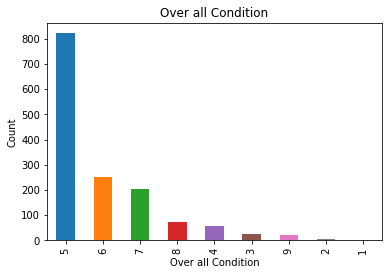

In [54]:
total_f['OverallCond'].value_counts().plot(kind='bar')
plt.title('Over all Condition')
plt.xlabel('Over all Condition')
plt.ylabel('Count')
sns.despine

Text(0.5,1,'Price vs Lot Area')

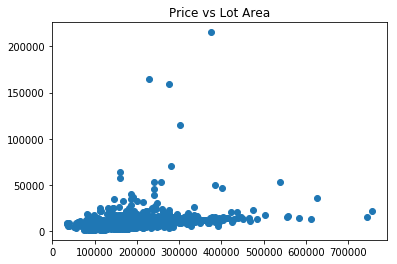

In [55]:
plt.scatter(total_f.SalePrice,total_f.LotArea)
plt.title('Price vs Lot Area')

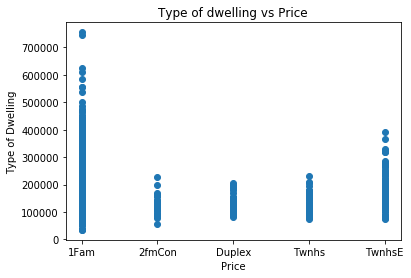

<function seaborn.utils.despine>

In [56]:
plt.scatter(total_f.BldgType, total_f.SalePrice)
plt.title('Type of dwelling vs Price')
plt.xlabel('Price')
plt.ylabel('Type of Dwelling')
plt.show()
sns.despine

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = total_f['SalePrice']
conv_dates = [1 if values == 2007 else 0 for values in total_f.YrSold]
total_f['date'] = conv_dates
train1 = total_f.drop(['Id', 'SalePrice'], axis=1)

In [58]:
from sklearn.cross_validation import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)

In [60]:
reg.fit(x_train, y_train)

ValueError: could not convert string to float: 'WD'

In [49]:
from nltk.metrics import *
reg.YrSold(x_test, y_test)

AttributeError: 'LinearRegression' object has no attribute 'YrSold'